-----------
Initializing structure...
time for choose_chunkdivision = 0.000115871 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.021451 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


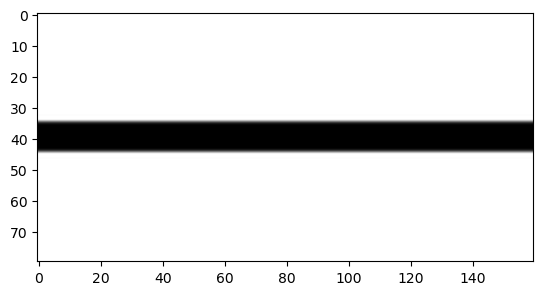

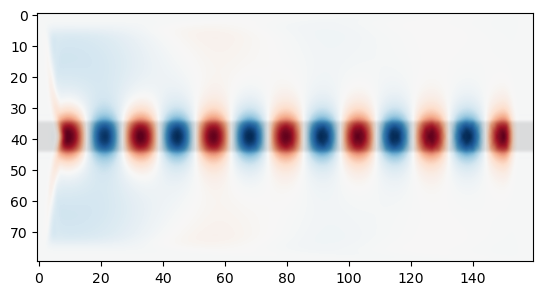

In [3]:
# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
import meep as mp

#Celda donde va a correr la simulación
cell = mp.Vector3(16, 8, 0)

#Geometria de la guia de onda
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf), #Guia de onda con dimensiones x y z infinitas
        center=mp.Vector3(), #Centrada en el origen
        material=mp.Medium(epsilon=12), #permitivadad del medio
    )
]

#Creacion de la fuente (Campo electrico polarizado en z que viaja en x)
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]
#Condiciones de contorno 
pml_layers = [mp.PML(1.0)]
#resolucion espacial del problema
resolution = 10
#Parámetros de la simulacion
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)
#tiempo de simulacion
sim.run(until=200)

import matplotlib.pyplot as plt
import numpy as np
# Visualiza los datos de permitividad como una imagen 2D. (Muestra el bloque)
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.axis()
plt.show()
# Recupera los datos del campo eléctrico en la dirección z. [11]
# component=mp.Ez solicita específicamente los datos del campo eléctrico en z. [11]
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.imshow(ez_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis()
plt.show()
#Los ejes estan haciendo referencia a el numero de pixeles en pantalla